# Deutsch-Jozsa algorithm

***

In [64]:
import qiskit

In [65]:
o = qiskit.quantum_info.Statevector.from_int(0, 2)
z = qiskit.quantum_info.Statevector.from_int(1, 2)

o, z

(Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

<br>

## $f(x) = 0$

***

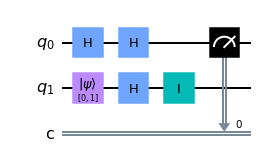

In [117]:
circuit = qiskit.QuantumCircuit(2, 1)
circuit.initialize([0,1], 1)
circuit.h((0, 1))
circuit.i(1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output='mpl')

### Simulate

***


Total count for 00 and 11 are: {'0': 1000}


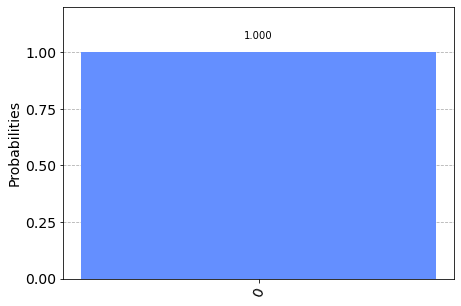

In [118]:
simulator = qiskit.providers.aer.QasmSimulator()
compiled_circuit = qiskit.transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:", counts)
qiskit.visualization.plot_histogram(counts)

<br>

## $f(x) = 1$

***


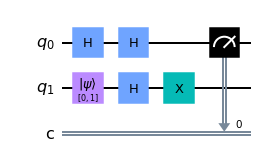

In [115]:
circuit = qiskit.QuantumCircuit(2, 1)
circuit.initialize([0,1], 1)
circuit.h((0, 1))
circuit.x(1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output='mpl')


### Simulate

***


Total count for 00 and 11 are: {'0': 1000}


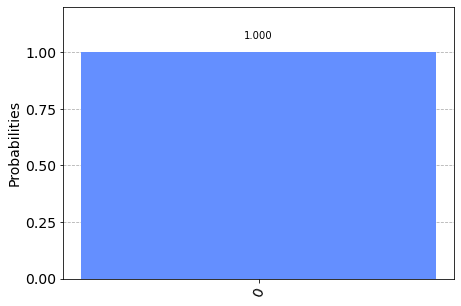

In [116]:
simulator = qiskit.providers.aer.QasmSimulator()
compiled_circuit = qiskit.transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:", counts)
qiskit.visualization.plot_histogram(counts)

<br>

## $f(0) = 0, f(1) = 1$


$ (x, y) \rightarrow (x, y \oplus f(x)) = (x, y \oplus x) $

***

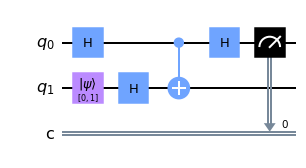

In [113]:
circuit = qiskit.QuantumCircuit(2, 1)
circuit.initialize([0,1], 1)
circuit.h((0, 1))
circuit.cnot(0, 1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output='mpl')


### Simulate

***

{'1': 1000}


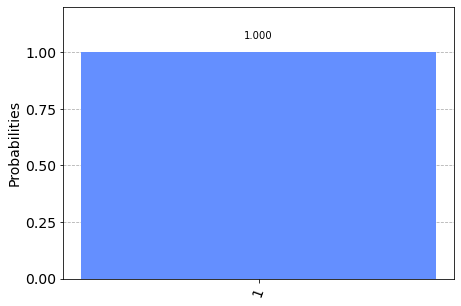

In [114]:
simulator = qiskit.providers.aer.QasmSimulator()
compiled_circuit = qiskit.transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
qiskit.visualization.plot_histogram(counts)

<br>

## $f(0) = 1, f(1) = 0$


***

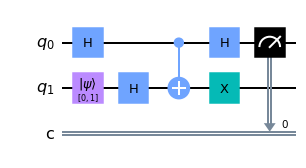

In [111]:
circuit = qiskit.QuantumCircuit(2, 1)
circuit.initialize([0,1], 1)
circuit.h((0, 1))
circuit.cnot(0, 1)
circuit.x(1)
circuit.h(0)
circuit.measure(0, 0)
circuit.draw(output='mpl')

{'1': 1000}


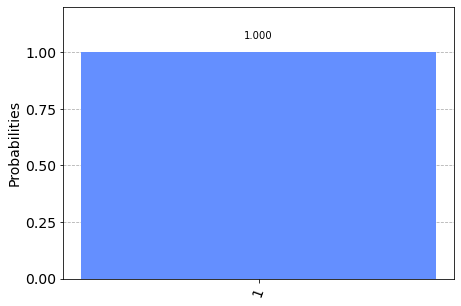

In [112]:
simulator = qiskit.providers.aer.QasmSimulator()
compiled_circuit = qiskit.transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
qiskit.visualization.plot_histogram(counts)

<br>

## Rough work

***

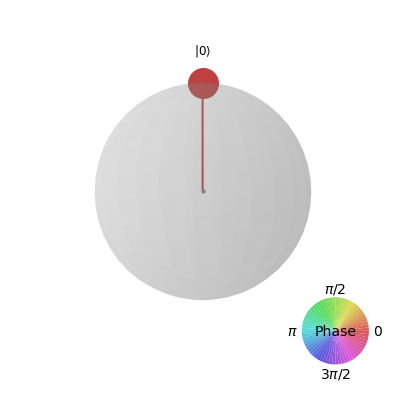

In [67]:
o.draw('qsphere')

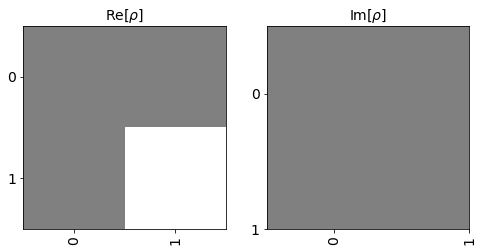

In [25]:
z.draw('hinton')

In [26]:
qiskit.quantum_info.Operator(circuit)

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [36]:
import qiskit.aqua as aqua
zo = aqua.utils.tensorproduct(z, o)
zo = qiskit.quantum_info.Statevector(zo)
zo

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


In [37]:
zo.evolve(circuit)

Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


***

## End